In [ ]:
!pip install python-pcapng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_attack = '/content/drive/MyDrive/IoT project/anomaly32k (1).pcapng'

In [ ]:
path_to_normal = '/content/drive/MyDrive/IoT project/normal50k (2).pcapng'

In [ ]:
from pcapng import FileScanner
import numpy as np

anomaly_blocks = []
normal_blocks = []
with open(path_to_normal, 'rb') as fp:
    scanner = FileScanner(fp)
    
    for index, block in enumerate(scanner):
      try: 
        decode_block = block._decoded['packet_data']  
        current_vector = []    
        for byte in decode_block:
          current_vector.append(int(byte))
        current_vector = np.array(current_vector)
        normal_blocks.append(current_vector)
      except:
        print(index)

0
1
49786


In [ ]:
with open(path_to_attack, 'rb') as fp:
    scanner = FileScanner(fp)
    for index, block in enumerate(scanner):
      try: 
        decode_block = block._decoded['packet_data']  
        current_vector = []    
        for byte in decode_block:
          current_vector.append(int(byte))
        current_vector = np.array(current_vector)
        anomaly_blocks.append(current_vector)
      except:
        print(index)

0
1
32175


In [ ]:
normal_blocks_len = []
for item in normal_blocks:
  if len(item) == 112:
    normal_blocks_len.append(item)
anomaly_blocks_len = []
for item in anomaly_blocks:
  if len(item) == 112:
    anomaly_blocks_len.append(item)  

In [ ]:
NORMAL = np.vstack(normal_blocks_len)

In [ ]:
NORMAL.shape

(49616, 112)

In [ ]:
ANOMALY = np.vstack(anomaly_blocks_len)

In [ ]:
ANOMALY.shape

(27701, 112)

In [ ]:
import pandas as pd
data = pd.DataFrame(np.vstack((NORMAL, ANOMALY)), columns=[str(item) + 'e' for item in range(112)])
labels = [0] * NORMAL.shape[0] + [1] * ANOMALY.shape[0]
data['label'] = labels

In [ ]:
dir(data)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex

In [ ]:
data

,0e,1e,2e,3e,4e,5e,6e,7e,8e,9e,...,103e,104e,105e,106e,107e,108e,109e,110e,111e,label
0,0,12,41,155,247,7,0,12,41,6,...,49,58,51,51,32,50,48,50,50,0
1,0,12,41,155,247,7,0,12,41,6,...,49,58,51,51,32,50,48,50,50,0
2,0,12,41,155,247,7,0,12,41,6,...,49,58,51,51,32,50,48,50,50,0
3,0,12,41,155,247,7,0,12,41,6,...,49,58,51,51,32,50,48,50,50,0
4,0,12,41,155,247,7,0,12,41,6,...,49,58,51,51,32,50,48,50,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77312,0,12,41,155,247,7,0,12,41,6,...,53,58,50,49,32,50,48,50,50,1
77313,0,12,41,155,247,7,0,12,41,6,...,53,58,50,49,32,50,48,50,50,1
77314,0,12,41,155,247,7,0,12,41,6,...,102,113,113,119,97,108,113,108,107,1
77315,0,12,41,155,247,7,0,12,41,6,...,53,58,50,49,32,50,48,50,50,1


In [ ]:
data = data.sample(frac=1)

In [ ]:
data

,0e,1e,2e,3e,4e,5e,6e,7e,8e,9e,...,103e,104e,105e,106e,107e,108e,109e,110e,111e,label
42195,0,12,41,155,247,7,0,12,41,6,...,50,58,51,52,32,50,48,50,50,0
77238,0,12,41,155,247,7,0,12,41,6,...,53,58,49,53,32,50,48,50,50,1
25509,0,12,41,155,247,7,0,12,41,6,...,52,58,50,57,32,50,48,50,50,0
7187,0,12,41,155,247,7,0,12,41,6,...,51,58,51,57,32,50,48,50,50,0
64899,0,12,41,155,247,7,0,12,41,6,...,115,109,98,103,102,99,113,108,122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70571,0,12,41,155,247,7,0,12,41,6,...,53,58,53,48,32,50,48,50,50,1
70960,0,12,41,155,247,7,0,12,41,6,...,54,58,50,51,32,50,48,50,50,1
36630,0,12,41,155,247,7,0,12,41,6,...,51,58,49,50,32,50,48,50,50,0
31777,0,12,41,155,247,7,0,12,41,6,...,53,58,48,50,32,50,48,50,50,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(data.drop(['label'], axis=1))

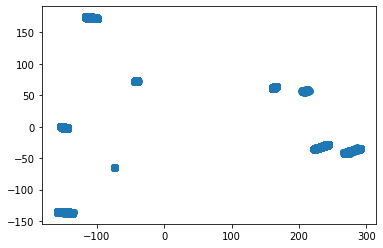

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
import seaborn as sns
df = pd.DataFrame(X, columns=['e1', 'e2'])
df['label'] = y

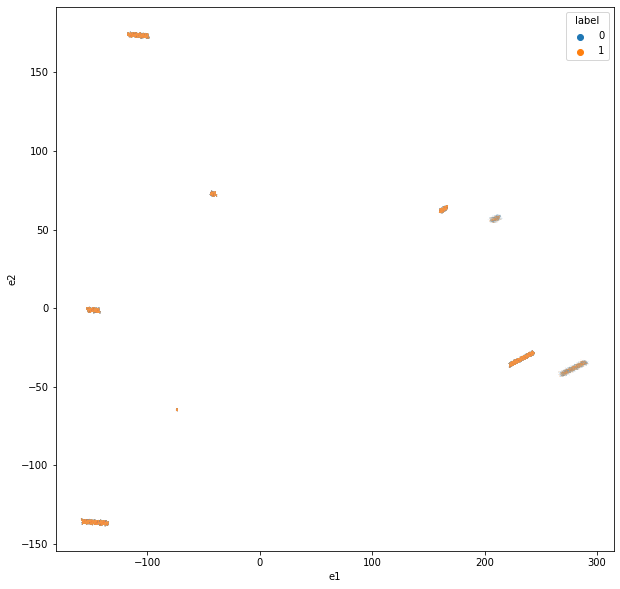

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df,x='e1', y='e2', hue='label', s=0.1)

In [ ]:
y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    
)


clf.fit(X_train, y_train, 
       
        verbose=10
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

Learning rate set to 0.059958
0:	learn: 0.4769167	total: 71.8ms	remaining: 1m 11s
10:	learn: 0.0135887	total: 317ms	remaining: 28.5s
20:	learn: 0.0012013	total: 621ms	remaining: 29s
30:	learn: 0.0002996	total: 1.06s	remaining: 33.1s
40:	learn: 0.0001152	total: 1.31s	remaining: 30.7s
50:	learn: 0.0000892	total: 1.52s	remaining: 28.4s
60:	learn: 0.0000726	total: 1.77s	remaining: 27.3s
70:	learn: 0.0000726	total: 1.99s	remaining: 26s
80:	learn: 0.0000726	total: 2.27s	remaining: 25.7s
90:	learn: 0.0000716	total: 2.65s	remaining: 26.4s
100:	learn: 0.0000707	total: 2.87s	remaining: 25.6s
110:	learn: 0.0000707	total: 3.09s	remaining: 24.8s
120:	learn: 0.0000699	total: 3.31s	remaining: 24s
130:	learn: 0.0000699	total: 3.52s	remaining: 23.4s
140:	learn: 0.0000682	total: 3.81s	remaining: 23.2s
150:	learn: 0.0000682	total: 4.03s	remaining: 22.7s
160:	learn: 0.0000682	total: 4.24s	remaining: 22.1s
170:	learn: 0.0000681	total: 4.46s	remaining: 21.6s
180:	learn: 0.0000667	total: 4.71s	remaining: 21.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 30 kB/s 


In [ ]:
y_pred.shape

(18464,)

In [ ]:
y_test = qweasd

In [ ]:
np.random.randint(0, 2, (3000))

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11509
           1       1.00      0.78      0.88      6955

    accuracy                           0.92     18464
   macro avg       0.94      0.89      0.91     18464
weighted avg       0.93      0.92      0.92     18464



In [ ]:
u, s, v = np.linalg.svd(data.drop(['label'], axis=1))

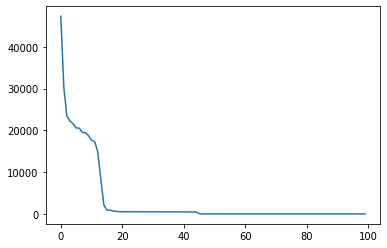

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pca.singular_values_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(data.drop(['label'], axis=1), data['label'])

RandomForestClassifier(random_state=0)

In [ ]:
importances = forest.feature_importances_

Text(0, 0.5, 'Mean decrease in impurity')

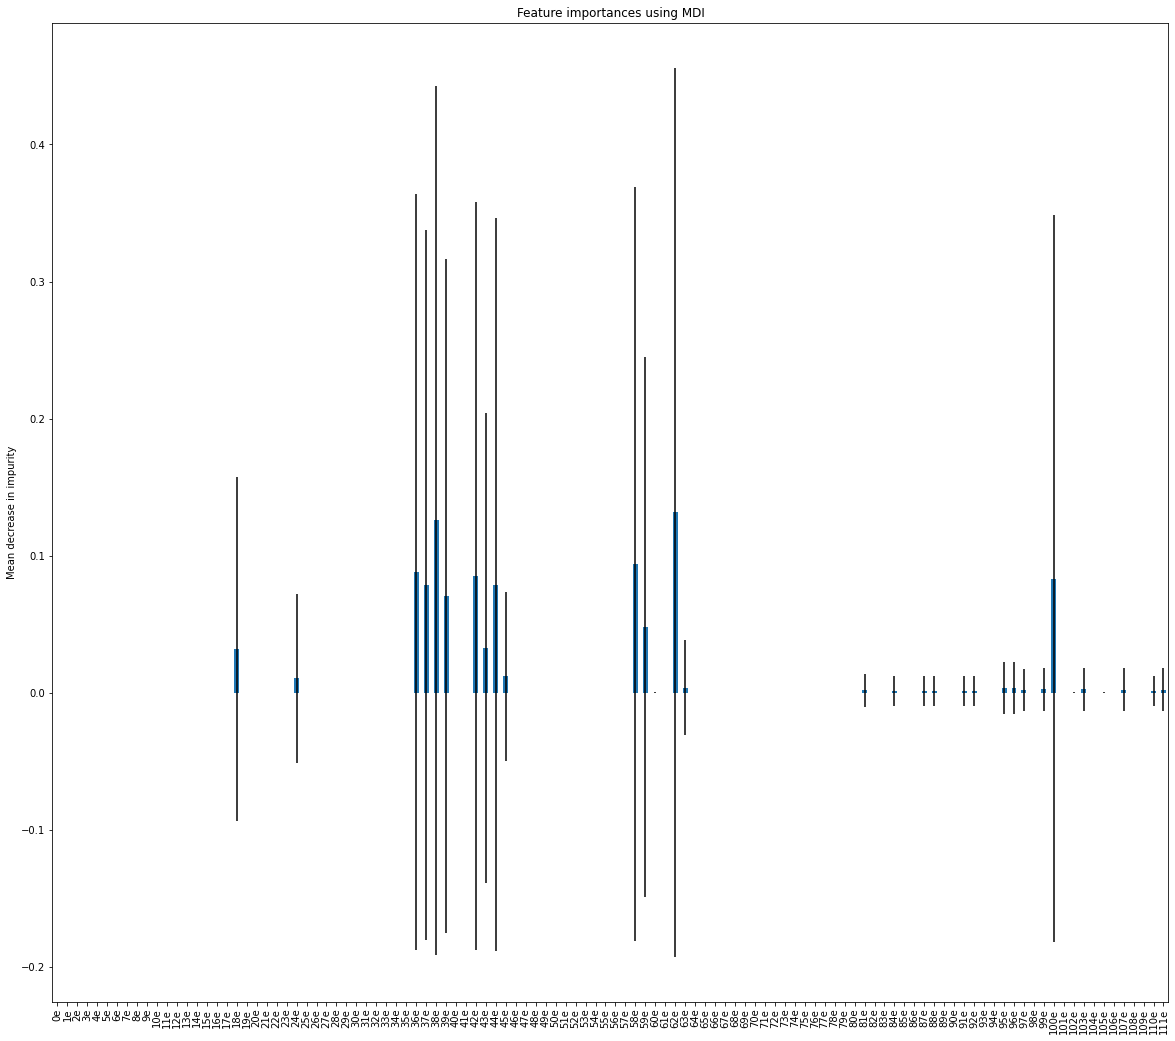

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=data.columns[:-1])
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
fig, ax = plt.subplots(figsize=(20, 18))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

In [ ]:
data.columns[:-1]

Index(['0e', '1e', '2e', '3e', '4e', '5e', '6e', '7e', '8e', '9e',
       ...
       '102e', '103e', '104e', '105e', '106e', '107e', '108e', '109e', '110e',
       '111e'],
      dtype='object', length=112)

In [ ]:
forest_importances.sort_values(ascending=False)[]

62e    0.131589
38e    0.125678
58e    0.093692
36e    0.088173
42e    0.085134
         ...   
32e    0.000000
31e    0.000000
30e    0.000000
29e    0.000000
56e    0.000000
Length: 112, dtype: float64

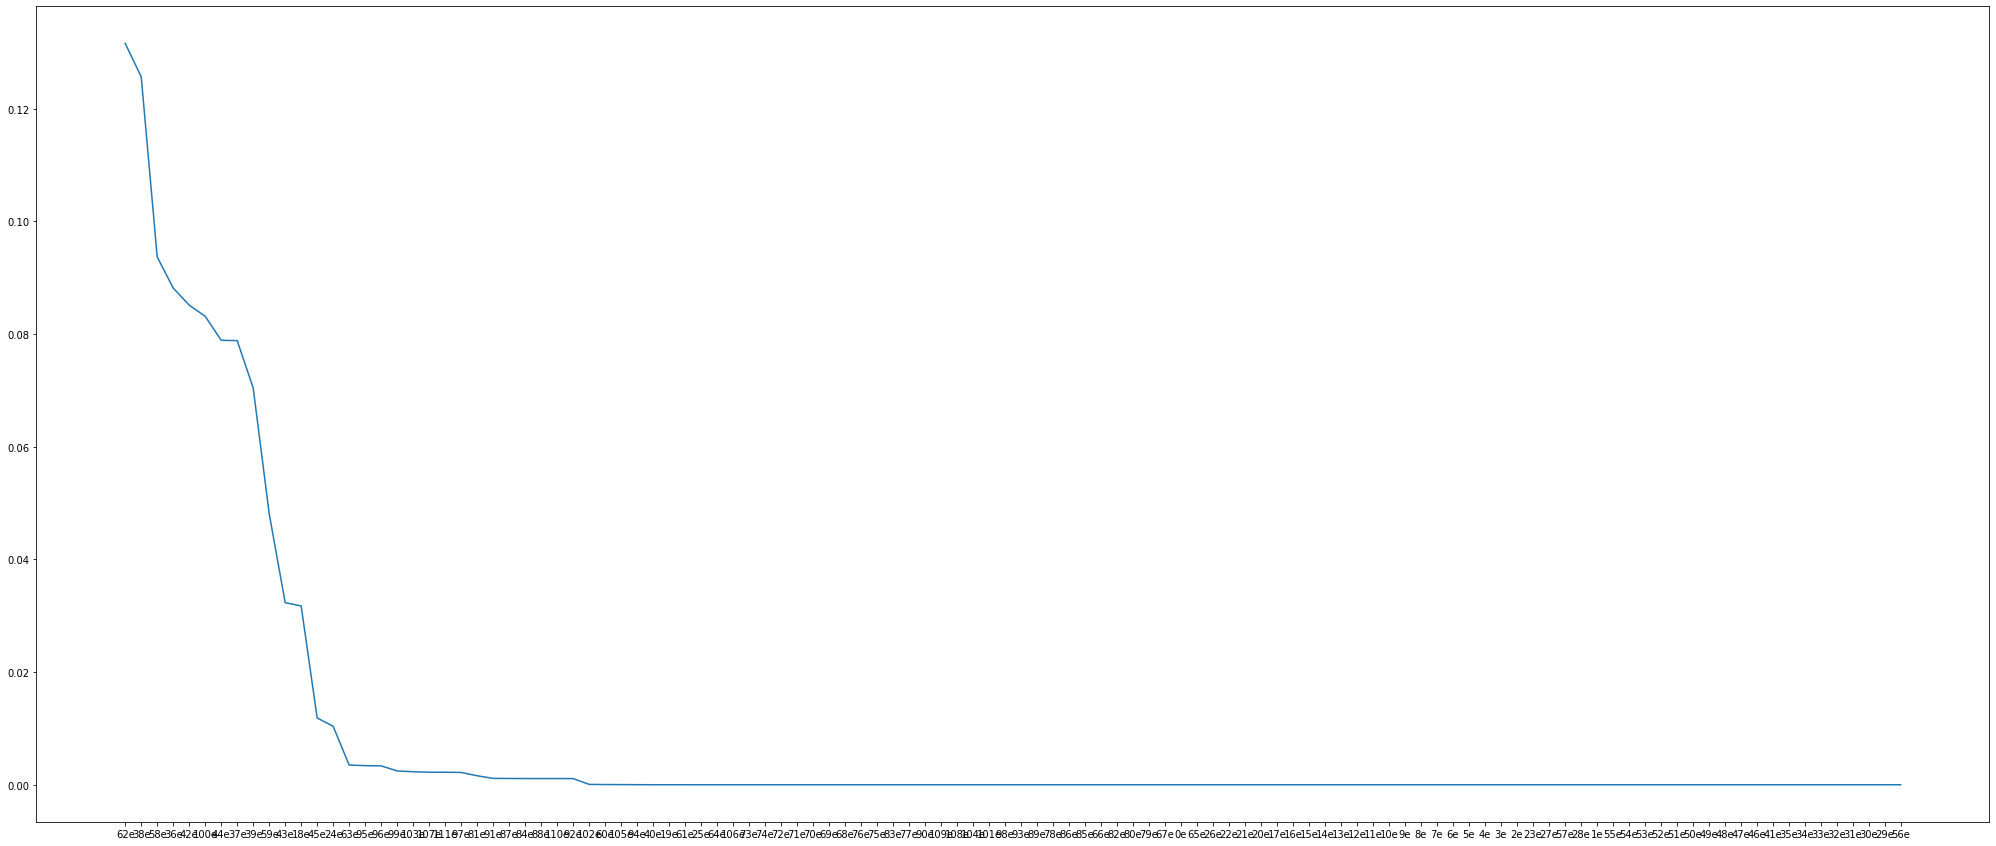

In [ ]:
plt.figure(figsize=(35, 15))
plt.plot(forest_importances.sort_values(ascending=False))

In [ ]:
forest_importances.sort_values()

0e      0.000000
1e      0.000000
2e      0.000000
3e      0.000000
4e      0.000000
          ...   
107e    0.002224
108e    0.000000
109e    0.000000
110e    0.001096
111e    0.002219
Length: 112, dtype: float64